# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Agal Lulanika
- **Email:** mc001d5y1224@student.devacademy.id
- **ID Dicoding:** MC001D5Y1224

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari? Kapan waktu paling sibuk dan paling sepi?
2. Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda? Musim mana yang memiliki tingkat peminjaman tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from IPython.display import display

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [8]:
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

**Insight:**
- Membaca Dataset
> Kode hour_df = pd.read_csv("hour.csv") dan day_df = pd.read_csv("day.csv") digunakan untuk membaca file CSV dan menyimpannya dalam bentuk DataFrame menggunakan pustaka pandas.
- Perbedaan Kedua Dataset
> 'hour.csv' berisi data peminjaman sepeda dalam satuan jam, memungkinkan analisis pola penggunaan sepeda dalam satu hari.
> 'day.csv' berisi data peminjaman sepeda dalam satuan hari, cocok untuk melihat tren harian dan musiman.
- Persiapan Analisis Data
> Setelah kita membaca dataset, langkah selanjutnya adalah melakukan eksplorasi awal seperti mengecek struktur data, tipe data, jumlah missing values, dan membersihkan data sebelum analisis lebih lanjut.








### Assessing Data

In [9]:
def display_info(df, name):
    print(f"\nInformasi Dataset {name}:")
    info_df = pd.DataFrame({
        "Kolom": df.columns,
        "Tipe Data": df.dtypes.values,
        "Jumlah Missing": df.isnull().sum().values,
        "Jumlah Unik": df.nunique().values
    })

print("\nInformasi Statistik Dataset Hourly")
display(hour_df.describe())

print("\nInformasi Statistik Dataset Daily")
display(day_df.describe())


Informasi Statistik Dataset Hourly


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



Informasi Statistik Dataset Daily


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
def display_missing_values(df, dataset_name):
    """Menampilkan jumlah missing values dalam bentuk tabel."""
    missing_values = df.isnull().sum().reset_index()
    missing_values.columns = ["Kolom", "Jumlah Missing"]

    print(f"\nJumlah Missing Values ({dataset_name}):")
    print(tabulate(missing_values, headers="keys", tablefmt="grid"))

display_missing_values(hour_df, "Hourly")
display_missing_values(day_df, "Daily")



Jumlah Missing Values (Hourly):
+----+------------+------------------+
|    | Kolom      |   Jumlah Missing |
+====+============+==================+
|  0 | instant    |                0 |
+----+------------+------------------+
|  1 | dteday     |                0 |
+----+------------+------------------+
|  2 | season     |                0 |
+----+------------+------------------+
|  3 | yr         |                0 |
+----+------------+------------------+
|  4 | mnth       |                0 |
+----+------------+------------------+
|  5 | hr         |                0 |
+----+------------+------------------+
|  6 | holiday    |                0 |
+----+------------+------------------+
|  7 | weekday    |                0 |
+----+------------+------------------+
|  8 | workingday |                0 |
+----+------------+------------------+
|  9 | weathersit |                0 |
+----+------------+------------------+
| 10 | temp       |                0 |
+----+------------+------------

**Insight:**
- Menampilkan Informasi Dataset dalam Bentuk Tabel
> Fungsi `display_info(df, name)` dibuat untuk menampilkan informasi dataset dalam bentuk tabel, termasuk nama kolom, tipe data, jumlah nilai yang hilang *`(missing values)`*, dan jumlah nilai unik.
Hal ini mempermudah analisis awal dataset dibandingkan hanya menggunakan `df.info()`, karena memberikan tampilan yang lebih rapi dan mudah dibaca.
- Ringkasan Statistik Dataset
> `hour_df.describe()` dan `day_df.describe()` digunakan untuk menampilkan statistik ringkasan dataset, seperti rata-rata *(mean)*, standar deviasi *(std)*, nilai minimum *(min)*, kuartil, dan nilai maksimum *(max)*.
Ini membantu dalam memahami distribusi data dan mendeteksi kemungkinan outlier atau nilai ekstrem.
- Menampilkan Jumlah Missing Values dalam Bentuk Tabel
> Fungsi `display_missing_values(df, dataset_name)` digunakan untuk menampilkan jumlah missing values pada setiap kolom dalam format tabel menggunakan pustaka tabulate.
Format ini lebih rapi dibandingkan hanya menggunakan `df.isnull().sum()`, sehingga lebih mudah untuk mengidentifikasi apakah ada kolom yang memiliki nilai kosong yang perlu ditangani sebelum analisis lebih lanjut.




### Cleaning Data

**Insight:**
- Berdasarkan hasil pengecekan, tidak ditemukan missing values maupun data duplikat dalam dataset hourly maupun daily. Selain itu, tipe data pada setiap kolom sudah sesuai dengan nilai yang diharapkan. Oleh karena itu, tidak diperlukan proses pembersihan data lebih lanjut.

## Exploratory Data Analysis (EDA)

### Pola Peminjaman Sepeda

**A. Pola peminjaman sepeda berdasarkan jam dalam sehari**

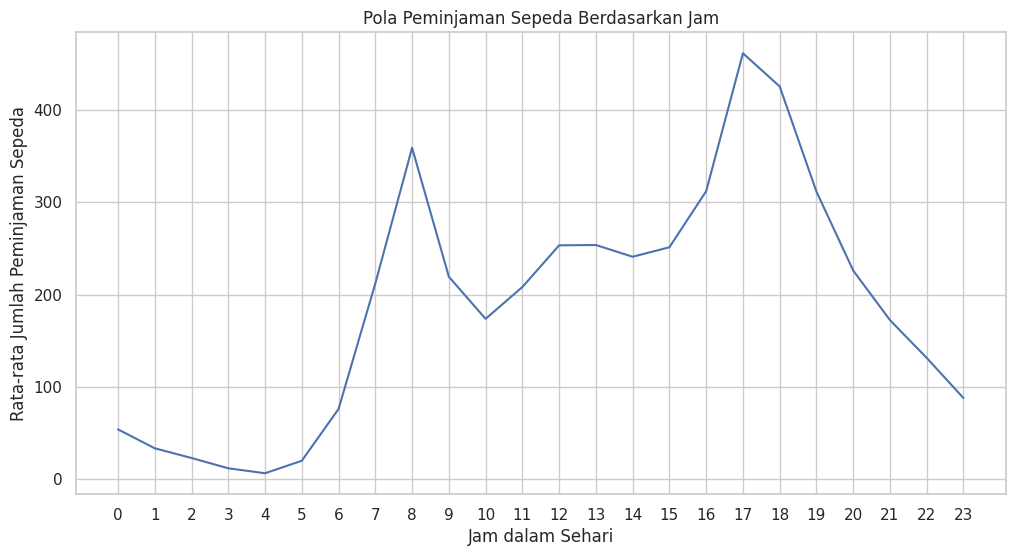

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x="hr", y="cnt", estimator=np.mean, errorbar=None, color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.show()

**B. Pengaruh musim terhadap jumlah peminjaman sepeda**

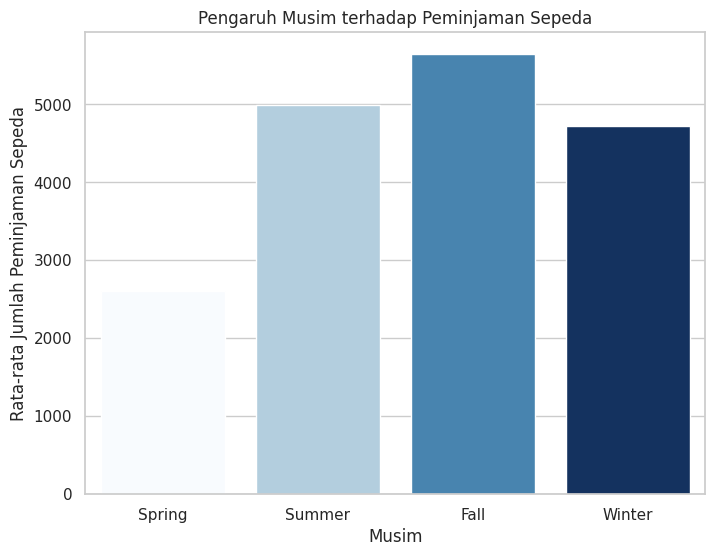

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x="season", y="cnt", estimator=np.mean, errorbar=None, hue="season", palette="Blues", legend=False)
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

**Insight:**
- Pola Peminjaman Sepeda Berdasarkan Jam
> Peminjaman sepeda cenderung meningkat tajam pada sekitar pukul **7-8 pagi** dan sekitar pukul **17-18 sore**.
Pola ini menunjukkan adanya dua puncak yang kemungkinan besar berkaitan dengan jam berangkat dan pulang kerja atau sekolah.
Pada tengah malam hingga dini hari, jumlah peminjaman sepeda sangat rendah, yang sesuai dengan pola aktivitas manusia.
- Pengaruh Musim terhadap Peminjaman Sepeda
> Musim gugur (Fall) memiliki rata-rata peminjaman sepeda tertinggi dibandingkan musim lainnya.
Musim dingin (Winter) menunjukkan rata-rata peminjaman yang lebih rendah, kemungkinan karena cuaca yang kurang mendukung untuk bersepeda.
Musim semi (Spring) dan musim panas (Summer) memiliki pola peminjaman yang relatif seimbang tetapi masih lebih rendah dibandingkan musim gugur.
- Kaitan antara Waktu dan Faktor Musim
> Tren peminjaman sepeda sangat dipengaruhi oleh waktu dalam sehari dan juga oleh musim dalam setahun.
Faktor cuaca dan kenyamanan berkendara tampaknya memainkan peran penting dalam keputusan pengguna untuk menyewa sepeda.
Strategi pengelolaan sepeda dapat mempertimbangkan pola ini, misalnya dengan meningkatkan ketersediaan sepeda di jam sibuk dan memperhatikan permintaan musiman.


### RFM Analysis

In [13]:
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

display(hour_df.head())
display(day_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

last_date = day_df['dteday'].max()
day_df['Recency'] = (last_date - day_df['dteday']).dt.days

day_df['Frequency'] = 1

day_df['Monetary'] = day_df['cnt']

rfm_df = day_df.groupby('dteday').agg({'Recency': 'min', 'Frequency': 'sum', 'Monetary': 'sum'}).reset_index()

rfm_df.head()

,dteday,Recency,Frequency,Monetary
0,2011-01-01,730,1,985
1,2011-01-02,729,1,801
2,2011-01-03,728,1,1349
3,2011-01-04,727,1,1562
4,2011-01-05,726,1,1600


**Penjelasan Kode**
- Kode ini bertujuan untuk menghitung RFM (Recency, Frequency, Monetary) Analysis dari data peminjaman berdasarkan tanggal.
- Pertama, kolom dteday dikonversi ke format datetime agar bisa dihitung selisih harinya.
- Kemudian, Recency dihitung sebagai jumlah hari sejak transaksi terakhir dengan mengambil selisih antara last_date (tanggal terakhir dalam dataset) dan dteday.
- Selanjutnya, kolom Frequency ditambahkan dengan nilai 1 untuk menunjukkan bahwa setiap transaksi dihitung sebagai satu kali kejadian. Untuk Monetary, nilainya diambil dari jumlah peminjaman (cnt).
- Setelah itu, data dikelompokkan berdasarkan dteday dengan metode agregasi: Recency mengambil nilai minimum, sedangkan Frequency dan Monetary dijumlahkan untuk mengetahui total transaksi dan jumlah peminjaman pada hari tersebut.

**Hasil RFM Analysis**

- Hasil tabel menunjukkan lima entri pertama dari analisis RFM. Kolom dteday merepresentasikan tanggal transaksi, Recency menunjukkan jarak dalam hari sejak transaksi terakhir (menurun setiap harinya), Frequency selalu bernilai 1 karena data dikelompokkan per hari, dan Monetary menunjukkan jumlah total peminjaman dalam satu hari.
- Sebagai contoh, pada 1 Januari 2011, nilai Recency adalah 730 hari sejak transaksi terakhir, Frequency adalah 1, dan Monetary sebesar 985. Pada hari berikutnya, Recency berkurang menjadi 729, sementara Frequency tetap 1 dan Monetary turun menjadi 801.
- Data ini dapat digunakan untuk menganalisis pola peminjaman berdasarkan waktu dan mengidentifikasi tren penggunaan layanan peminjaman.

### Clustering (Binning)

In [15]:
day_df = pd.read_csv("day.csv")

bins = [0, 1000, 3000, 5000, day_df['cnt'].max()]
labels = ['Low Usage', 'Medium Usage', 'High Usage', 'Very High Usage']
day_df['Usage Cluster'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, include_lowest=True)

day_df['Usage Cluster'].value_counts()

,count
Usage Cluster,
Very High Usage,286
High Usage,273
Medium Usage,153
Low Usage,19


**Hasil Clustering (Binning)**

Saya mengelompokkan hari berdasarkan jumlah peminjaman sepeda:

- Very High Usage: >5000 peminjaman (286 hari)
- High Usage: 3000–5000 peminjaman (273 hari)
- Medium Usage: 1000–3000 peminjaman (153 hari)
- Low Usage: <1000 peminjaman (19 hari)

Kita bisa melihat bahwa sebagian besar hari memiliki jumlah peminjaman yang tinggi, dan hanya sedikit hari dengan penggunaan rendah.

### Langkah-langkah yang dilakukan:
1. Menentukan batas bin (interval) untuk clustering
> `bins = [0, 1000, 3000, 5000, day_df['cnt'].max()]`
Ini membagi jumlah peminjaman (cnt) menjadi 4 kategori berdasarkan interval tertentu.
2. Memberi label pada tiap kategori
> `labels = ['Low Usage', 'Medium Usage', 'High Usage', 'Very High Usage']`
Setiap bin diberi nama yang menggambarkan intensitas peminjaman.
3. Mengelompokkan data ke dalam cluster menggunakan pd.cut
> `day_df['Usage Cluster'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, include_lowest=True)`
Fungsi `pd.cut()` digunakan untuk mengelompokkan data ke dalam kategori yang telah ditentukan.
4. Melihat distribusi cluster
> `day_df['Usage Cluster'].value_counts()`
Menampilkan jumlah data dalam masing-masing kategori `(Low, Medium, High, Very High Usage)`.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  
### Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari? Kapan waktu paling sibuk dan paling sepi?

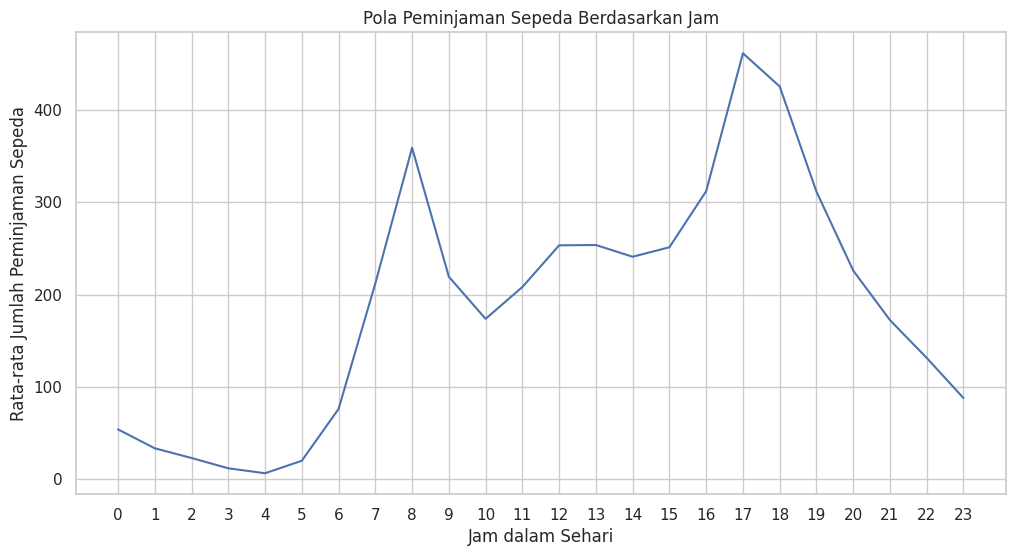

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x="hr", y="cnt", estimator=np.mean, errorbar=None, color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.show()

**1. Pola Peminjaman Sepeda Berdasarkan Jam dalam Sehari**
- Dari grafik diatas, pola peminjaman sepeda menunjukkan dua puncak utama: sekitar pukul 7-8 pagi dan 17-18 sore.
- Waktu paling sibuk adalah pada jam-jam tersebut, yang kemungkinan besar bertepatan dengan jam berangkat dan pulang kerja/sekolah.
- Peminjaman paling sedikit terjadi antara pukul 0 hingga 5, ketika sebagian besar orang sedang beristirahat.

### Pertanyaan 2:
### Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda? Musim mana yang memiliki tingkat peminjaman tertinggi dan terendah?

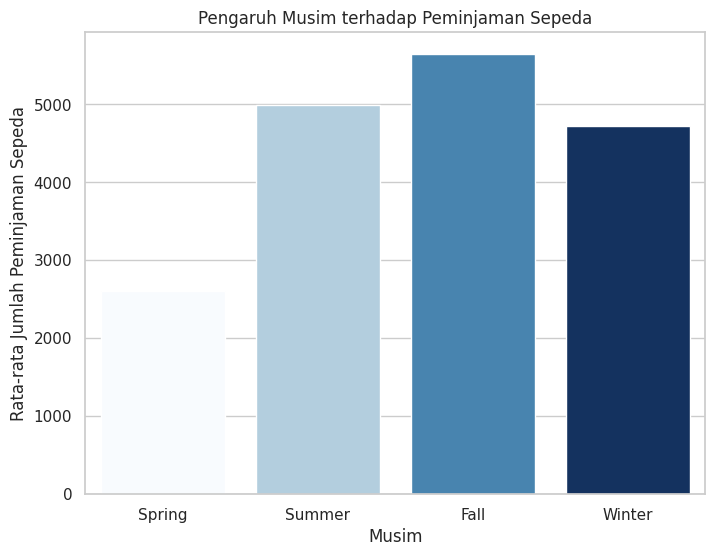

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x="season", y="cnt", estimator=np.mean, errorbar=None, hue="season", palette="Blues", legend=False)
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

**2. Pengaruh Musim terhadap Peminjaman Sepeda**
- Dari grafik diatas, musim Fall (musim gugur) memiliki tingkat peminjaman sepeda tertinggi, diikuti oleh Summer (musim panas).
- Spring (musim semi) menunjukkan tingkat peminjaman sepeda terendah, kemungkinan karena cuaca yang masih cukup dingin atau curah hujan yang lebih tinggi.
- Winter (musim dingin) juga memiliki tingkat peminjaman yang lebih rendah dibandingkan Fall dan Summer, tetapi masih lebih tinggi dibandingkan Spring.

## Analisis Lanjutan

### Pola peminjaman berdasarkan hari kerja dan akhir pekan

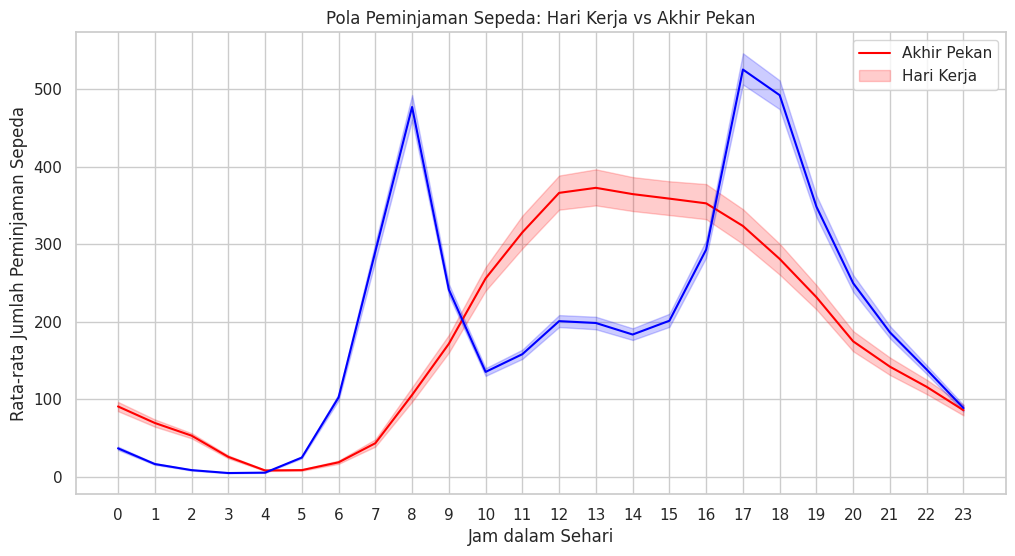

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x="hr", y="cnt", hue="workingday", estimator='mean', palette=["red", "blue"])
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.legend(["Akhir Pekan", "Hari Kerja"])
plt.xticks(range(0, 24))
plt.show()

**Pola Peminjaman Sepeda di Hari Kerja vs Akhir Pekan**
- Grafik diatas menunjukkan pola peminjaman sepeda berdasarkan jam dalam sehari untuk hari kerja (garis biru) dan akhir pekan (garis merah).
- Pada hari kerja, terdapat dua puncak peminjaman sepeda yang signifikan: pagi sekitar pukul 8 (kemungkinan besar terkait dengan jam berangkat kerja/sekolah) dan sore sekitar pukul 17-18 (jam pulang kerja/sekolah).
- Pola peminjaman di akhir pekan lebih merata dengan puncak yang lebih landai sekitar pukul 10-15, yang menunjukkan peminjaman lebih banyak dilakukan untuk aktivitas rekreasi daripada transportasi rutin.

### Analisis Pengaruh Suhu terhadap Peminjaman Sepeda di Setiap Musim

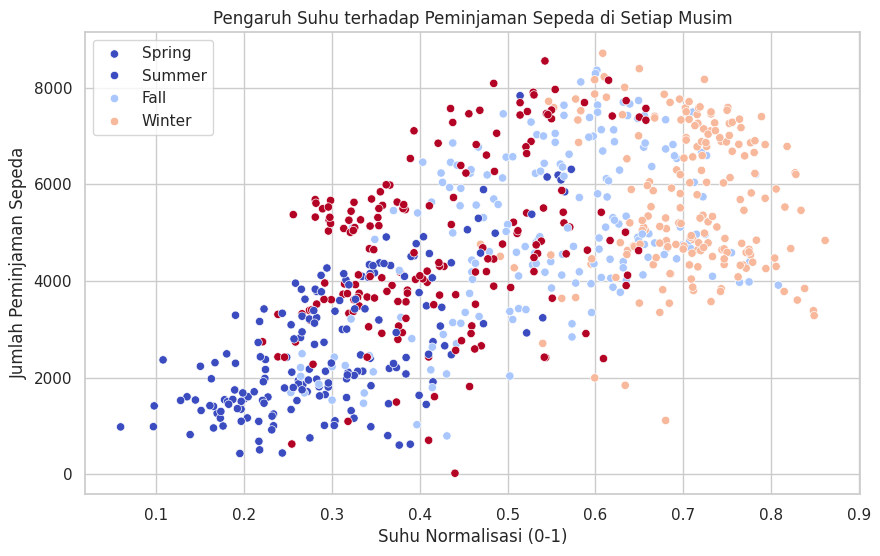

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x="temp", y="cnt", hue="season", palette="coolwarm")
plt.xlabel("Suhu Normalisasi (0-1)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Suhu terhadap Peminjaman Sepeda di Setiap Musim")
plt.legend(["Spring", "Summer", "Fall", "Winter"])
plt.show()


**Pengaruh Suhu terhadap Peminjaman Sepeda di Setiap Musim**
- Grafik scatter plot diatas menunjukkan hubungan antara suhu normalisasi (0-1) dan jumlah peminjaman sepeda di setiap musim.
- Tren menunjukkan bahwa semakin tinggi suhu (dalam rentang normalisasi), semakin banyak jumlah peminjaman sepeda, terutama pada musim panas dan musim gugur.
- Pada suhu yang lebih rendah (musim semi dan musim dingin), jumlah peminjaman sepeda cenderung lebih sedikit, menunjukkan bahwa kondisi cuaca yang lebih hangat lebih mendukung penggunaan sepeda.

## Conclusion

- Pola harian peminjaman sepeda menunjukkan bahwa sepeda lebih sering digunakan sebagai moda transportasi utama pada hari kerja, dengan lonjakan peminjaman di jam berangkat dan pulang kerja/sekolah.
- Musim memiliki pengaruh besar terhadap jumlah peminjaman sepeda, dengan tingkat tertinggi terjadi pada musim gugur dan panas, sementara musim semi dan dingin menunjukkan peminjaman yang lebih rendah.